 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [41]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.count().isnull()

Date                           False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
dtype: bool

In [6]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [43]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [44]:
# Count nulls
algo_df.count().isnull()

Algo 1    False
Algo 2    False
dtype: bool

In [45]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [21]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [22]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [34]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [36]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [37]:
# Drop nulls
daily_returns.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [91]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = daily_returns.rename(columns = {"Close" : "S&P500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [177]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis = "columns", join = "inner")
combined_df = combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

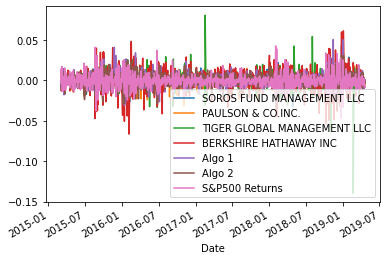

In [75]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

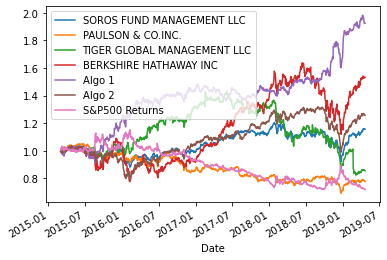

In [78]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

In [ ]:
#It appears that most of the portfolios performed better than the S&P 500, which was below its starting point.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

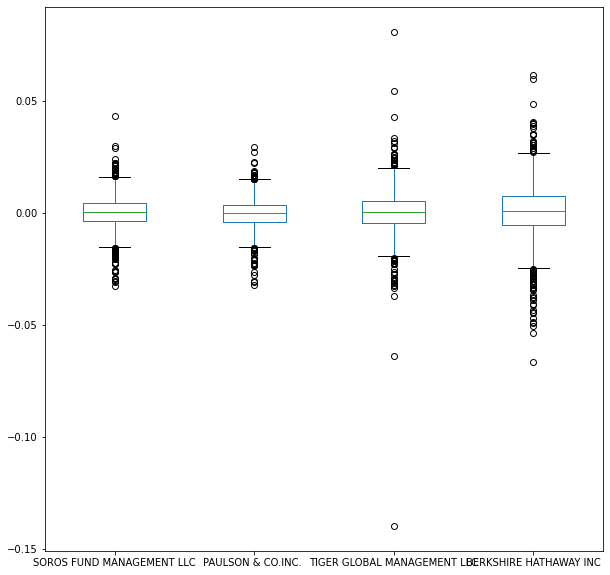

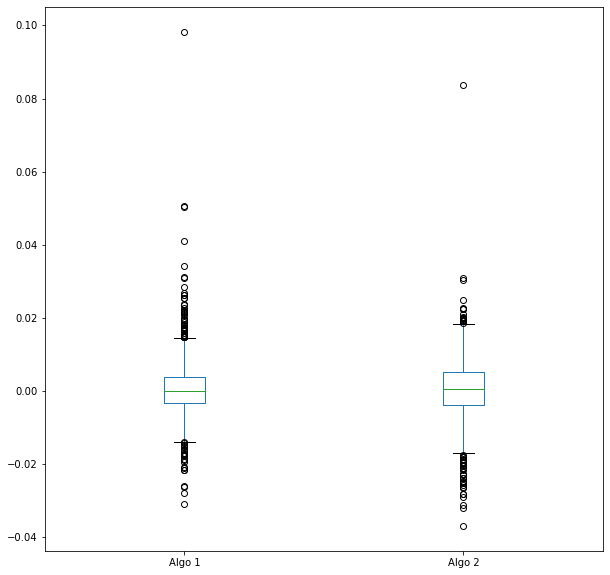

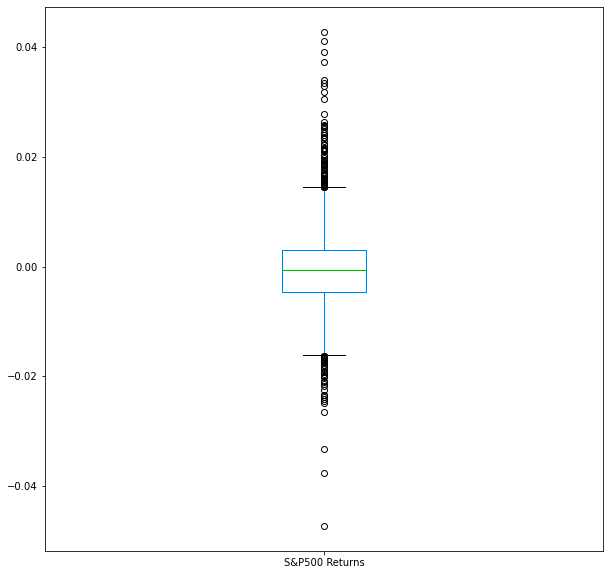

In [93]:
# Box plot to visually show risk
whale_df.plot(kind = "box", figsize = (10,10))
algo_df.plot(kind = "box", figsize = (10,10))
sp500_daily_returns.plot(kind = "box", figsize = (10,10))

### Calculate Standard Deviations

In [96]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()
algo_std = algo_df.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [102]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
sp500_daily_returns_std

S&P500 Returns    0.008135
dtype: float64

In [103]:
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [106]:
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [ ]:
#It appears that Algo 2, Tiger Global Management, and Bershire Hathaway are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized standard deviation (252 trading days)
annualized_whale_std = whale_std * np.sqrt(252)
annualized_algo_std = algo_std * np.sqrt(252)
annualized_sp500_std = sp500_daily_returns_std * np.sqrt(252)

In [108]:
annualized_whale_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [109]:
annualized_algo_std

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [110]:
annualized_sp500_std

S&P500 Returns    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

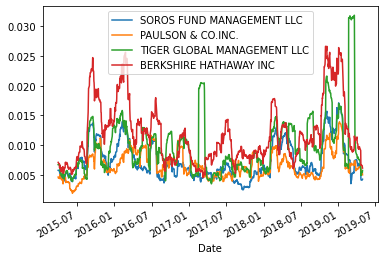

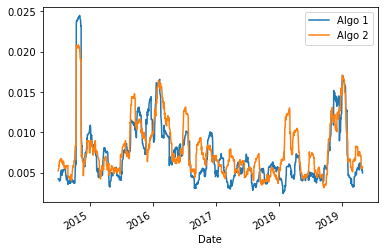

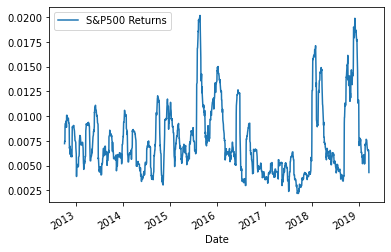

In [112]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_rolling_variance = whale_df.rolling(window=21).std()
algo_rolling_variance = algo_df.rolling(window=21).std()
sp500_rolling_variance = sp500_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
whale_rolling_variance.plot()
algo_rolling_variance.plot()
sp500_rolling_variance.plot()

### Calculate and plot the correlation

In [115]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500 Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [190]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_df["Algo 1"].cov(combined_df["S&P500 Returns"])
# Calculate variance of S&P 500
sp500_variance = combined_df["S&P500 Returns"].var()
# Computing beta
beta = algo1_covariance / sp500_variance
# Plot beta trend
beta

-0.030149214542337766

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [119]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

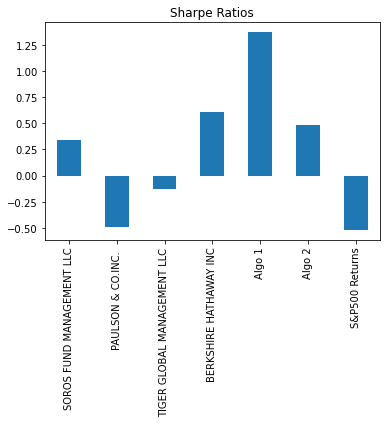

In [120]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
#It seems that overall the algorithmic trading strategies outperform both the S&P500 and the Whales Portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [130]:
# Reading data from 1st stock
tsla_path = Path("Resources/TSLA Close - Sheet1.csv")
tsla_df = pd.read_csv(tsla_path)
tsla_df.set_index(pd.to_datetime(tsla_df['Date'], infer_datetime_format=True), inplace=True)
tsla_df.drop(columns=['Date'], inplace=True)

In [131]:
# Reading data from 2nd stock
goog_path = Path("Resources/GOOG Close - Sheet1.csv")
goog_df = pd.read_csv(goog_path)
goog_df.set_index(pd.to_datetime(goog_df['Date'], infer_datetime_format=True), inplace=True)
goog_df.drop(columns=['Date'], inplace=True)

In [195]:
# Reading data from 3rd stock
bac_path = Path("Resources/BAC Close - Sheet1.csv")
bac_df = pd.read_csv(bac_path)
bac_df.set_index(pd.to_datetime(bac_df['Date'], infer_datetime_format=True), inplace=True)
bac_df.drop(columns=['Date'], inplace=True)

In [198]:
sp_path = Path("Resources/S&P 500 Close - Sheet1.csv")
sp_df = pd.read_csv(bac_path)
sp_df.set_index(pd.to_datetime(sp_df['Date'], infer_datetime_format=True), inplace=True)
sp_df.drop(columns=['Date'], inplace=True)
sp_df.pct_change
sp_df.dropna()

,Close
Date,
2018-01-02 16:00:00,29.90
2018-01-03 16:00:00,29.80
2018-01-04 16:00:00,30.19
2018-01-05 16:00:00,30.33
2018-01-08 16:00:00,30.12
...,...
2018-12-24 13:00:00,22.73
2018-12-26 16:00:00,24.11
2018-12-27 16:00:00,24.37


In [137]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([tsla_df, goog_df, bac_df], axis='columns', join='inner')

combined_df

,Close,Close,Close
Date,,,
2018-01-02 16:00:00,64.11,1065.00,29.90
2018-01-03 16:00:00,63.45,1082.48,29.80
2018-01-04 16:00:00,62.92,1086.40,30.19
2018-01-05 16:00:00,63.32,1102.23,30.33
2018-01-08 16:00:00,67.28,1106.94,30.12
...,...,...,...
2018-12-24 13:00:00,59.08,976.22,22.73
2018-12-26 16:00:00,65.22,1039.46,24.11
2018-12-27 16:00:00,63.23,1043.88,24.37


In [136]:
# Reset Date index
combined_df

,TSLA,GOOG,BAC
Date,,,
2018-01-02 16:00:00,64.11,1065.00,29.90
2018-01-03 16:00:00,63.45,1082.48,29.80
2018-01-04 16:00:00,62.92,1086.40,30.19
2018-01-05 16:00:00,63.32,1102.23,30.33
2018-01-08 16:00:00,67.28,1106.94,30.12
...,...,...,...
2018-12-24 13:00:00,59.08,976.22,22.73
2018-12-26 16:00:00,65.22,1039.46,24.11
2018-12-27 16:00:00,63.23,1043.88,24.37


In [138]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["TSLA", "GOOG", "BAC"]

In [142]:
# Calculate daily returns
daily_returns = combined_df.pct_change().dropna()
# Drop NAs

# Display sample data
daily_returns

,TSLA,GOOG,BAC
Date,,,
2018-01-03 16:00:00,-0.010295,0.016413,-0.003344
2018-01-04 16:00:00,-0.008353,0.003621,0.013087
2018-01-05 16:00:00,0.006357,0.014571,0.004637
2018-01-08 16:00:00,0.062539,0.004273,-0.006924
2018-01-09 16:00:00,-0.008026,-0.000614,0.004980
...,...,...,...
2018-12-24 13:00:00,-0.076153,-0.003389,-0.027386
2018-12-26 16:00:00,0.103927,0.064780,0.060713
2018-12-27 16:00:00,-0.030512,0.004252,0.010784


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [143]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns

Date
2018-01-03 16:00:00    0.000925
2018-01-04 16:00:00    0.002785
2018-01-05 16:00:00    0.008522
2018-01-08 16:00:00    0.019963
2018-01-09 16:00:00   -0.001220
                         ...   
2018-12-24 13:00:00   -0.035643
2018-12-26 16:00:00    0.076473
2018-12-27 16:00:00   -0.005159
2018-12-28 16:00:00    0.016764
2018-12-31 16:00:00    0.001896
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [147]:
# Join your returns DataFrame to the original returns DataFrame
combined_df2 = pd.concat([daily_returns, portfolio_returns], axis='columns', join='inner')
combined_df2.columns = ["TSLA", "GOOG", "BAC", "Portfolio"]
combined_df2

,TSLA,GOOG,BAC,Portfolio
Date,,,,
2018-01-03 16:00:00,-0.010295,0.016413,-0.003344,0.000925
2018-01-04 16:00:00,-0.008353,0.003621,0.013087,0.002785
2018-01-05 16:00:00,0.006357,0.014571,0.004637,0.008522
2018-01-08 16:00:00,0.062539,0.004273,-0.006924,0.019963
2018-01-09 16:00:00,-0.008026,-0.000614,0.004980,-0.001220
...,...,...,...,...
2018-12-24 13:00:00,-0.076153,-0.003389,-0.027386,-0.035643
2018-12-26 16:00:00,0.103927,0.064780,0.060713,0.076473
2018-12-27 16:00:00,-0.030512,0.004252,0.010784,-0.005159


In [148]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df2.dropna()
combined_df2

,TSLA,GOOG,BAC,Portfolio
Date,,,,
2018-01-03 16:00:00,-0.010295,0.016413,-0.003344,0.000925
2018-01-04 16:00:00,-0.008353,0.003621,0.013087,0.002785
2018-01-05 16:00:00,0.006357,0.014571,0.004637,0.008522
2018-01-08 16:00:00,0.062539,0.004273,-0.006924,0.019963
2018-01-09 16:00:00,-0.008026,-0.000614,0.004980,-0.001220
...,...,...,...,...
2018-12-24 13:00:00,-0.076153,-0.003389,-0.027386,-0.035643
2018-12-26 16:00:00,0.103927,0.064780,0.060713,0.076473
2018-12-27 16:00:00,-0.030512,0.004252,0.010784,-0.005159


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [150]:
# Calculate the annualized `std`
combined_df2_std = combined_df2.std()
annualized_combined_df2_std = combined_df2_std * np.sqrt(252)
annualized_combined_df2_std

TSLA         0.584711
GOOG         0.281354
BAC          0.247335
Portfolio    0.290426
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

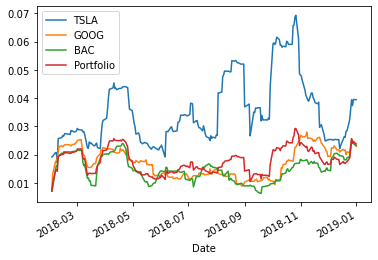

In [155]:
# Calculate rolling standard deviation
combined_df2_rolling_std = combined_df2.rolling(window=21).std()
# Plot rolling standard deviation
combined_df2_rolling_std.plot()

### Calculate and plot the correlation

In [156]:
# Calculate and plot the correlation
correlation = combined_df2.corr()
correlation

,TSLA,GOOG,BAC,Portfolio
TSLA,1.000000,0.336747,0.287202,0.861369
GOOG,0.336747,1.000000,0.596616,0.718276
BAC,0.287202,0.596616,1.000000,0.669276
Portfolio,0.861369,0.718276,0.669276,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

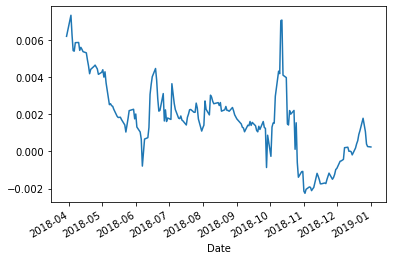

In [199]:
# Calculate and plot Beta
combined_df3 = pd.concat([daily_returns, portfolio_returns, sp_df], axis='columns', join='inner')
combined_df3.columns = ["TSLA", "GOOG", "BAC", "Portfolio", "SP 500"]
combined_df3_rolling_variance = combined_df3["SP 500"].rolling(window=60).var()
combined_df3_rolling_covariance = combined_df3["Portfolio"].rolling(window=60).cov(combined_df3["SP 500"])
combined_df3_rolling_beta = combined_df3_rolling_covariance / combined_df3_rolling_variance
combined_df3_rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = (combined_df2.mean() * 252) / (combined_df2.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

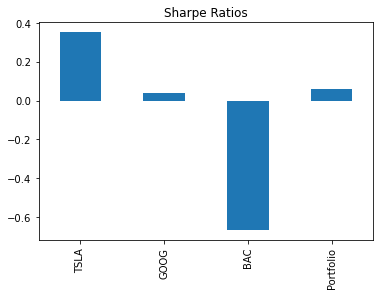

In [168]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
#Not bad! I outperformed both Bank of America and Google.